# BDAT 1004

# PROBLEM SET 3

# Question 1
Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men

In [1]:
#Step:1 Import the necessary libraries
import pandas as pd
#Step 2. Import the dataset from this address. 
#Step 3. Assign it to a variable called users
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep= "|", engine = 'python')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [2]:
#Step 4. Discover what is the mean age per occupation
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [3]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
users.rename(columns={"sex":"gender"}, inplace=True)
male = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
male.head()

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

In [4]:
gendersn = pd.DataFrame(male)
gendersn.rename(columns={"gender":"percent"}, inplace=True)
gendersn.head()

percent
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [5]:
new_gender = pd.DataFrame(gendersn.reset_index(level=["occupation", "gender"]))
new_gender.head()


,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [6]:
males = new_gender[new_gender["gender"] == "M"].sort_values(by="percent",ascending=False)
males

,occupation,gender,percent
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [7]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [8]:
#Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(["occupation", "gender"]).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [9]:
#Step 8. For each occupation present the percentage of women and men
new_gender

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


# Question 2

Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [10]:
#Step 1. Import the necessary libraries
import pandas as pd
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
euro = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')


In [11]:
#Step 4:
euro.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
#Step 5:
euro.shape[0]

16

In [13]:
#Step 6:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [14]:
#Step 7
discipline = euro[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [15]:
#Step 8
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [16]:
#Step 9
round(discipline['Yellow Cards'].mean())

7

In [17]:
#Step 10
euro[euro.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [18]:
#Step 11
euro[euro.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [19]:
#Step 12
euro.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [20]:
#Step 13
euro.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [21]:
#Step 14
euro.loc[euro.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3


Housing
Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [22]:
#Step 1
import pandas as pd
import numpy as np
#Step 2
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     1
1     3
2     4
3     3
4     2
     ..
95    1
96    1
97    4
98    3
99    3
Length: 100, dtype: int64 0     3
1     2
2     3
3     1
4     1
     ..
95    2
96    1
97    2
98    3
99    2
Length: 100, dtype: int64 0     13606
1     25297
2     26780
3     16968
4     16249
      ...  
95    28644
96    21175
97    10490
98    29193
99    18959
Length: 100, dtype: int64


In [23]:
#Step 3
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,1,3,13606
1,3,2,25297
2,4,3,26780
3,3,1,16968
4,2,1,16249


In [24]:
#Step 4
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,1,3,13606
1,3,2,25297
2,4,3,26780
3,3,1,16968
4,2,1,16249


In [25]:
#Step 5
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,1
1,3
2,4
3,3
4,2
...,...
95,28644
96,21175
97,10490
98,29193


In [26]:
#Step 6
len(bigcolumn)

300

In [27]:
#Step 7
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,1
1,3
2,4
3,3
4,2
...,...
295,28644
296,21175
297,10490
298,29193


# Question 4

In [28]:
#Step 1,2,3
import pandas as pd
import datetime

data = pd.read_csv("wind.txt", sep = "\s+", parse_dates = {"Date" : ["Yr","Mo","Dy"]})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6574 non-null   datetime64[ns]
 1   RPT     6568 non-null   float64       
 2   VAL     6571 non-null   float64       
 3   ROS     6572 non-null   float64       
 4   KIL     6569 non-null   float64       
 5   SHA     6572 non-null   float64       
 6   BIR     6574 non-null   float64       
 7   DUB     6571 non-null   float64       
 8   CLA     6572 non-null   float64       
 9   MUL     6571 non-null   float64       
 10  CLO     6573 non-null   float64       
 11  BEL     6574 non-null   float64       
 12  MAL     6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [29]:
#Step 4
def updateDate(input):  
    if input.year > datetime.date.today().year:
        input = input + pd.DateOffset(years=-100)
    return input
data['date'] = data['Date'].apply(updateDate)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6574 non-null   datetime64[ns]
 1   RPT     6568 non-null   float64       
 2   VAL     6571 non-null   float64       
 3   ROS     6572 non-null   float64       
 4   KIL     6569 non-null   float64       
 5   SHA     6572 non-null   float64       
 6   BIR     6574 non-null   float64       
 7   DUB     6571 non-null   float64       
 8   CLA     6572 non-null   float64       
 9   MUL     6571 non-null   float64       
 10  CLO     6573 non-null   float64       
 11  BEL     6574 non-null   float64       
 12  MAL     6570 non-null   float64       
 13  date    6574 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(12)
memory usage: 719.2 KB


In [30]:
#Step 5

data = data.set_index(['Date'])

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 2061-01-01 to 1978-12-31
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   RPT     6568 non-null   float64       
 1   VAL     6571 non-null   float64       
 2   ROS     6572 non-null   float64       
 3   KIL     6569 non-null   float64       
 4   SHA     6572 non-null   float64       
 5   BIR     6574 non-null   float64       
 6   DUB     6571 non-null   float64       
 7   CLA     6572 non-null   float64       
 8   MUL     6571 non-null   float64       
 9   CLO     6573 non-null   float64       
 10  BEL     6574 non-null   float64       
 11  MAL     6570 non-null   float64       
 12  date    6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 719.0 KB


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
Date,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [31]:
#Step 6
display(data.isna().sum())
data2 = pd.DataFrame()
data2= data.dropna()

RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
date    0
dtype: int64

In [32]:
#Step 7
data2.notnull().sum().sum()
display(data2.notna().sum().sum())


85098

In [33]:
#Step 8
display(data2.mean().mean())

/var/folders/yy/ymk_cpm57435xr6q2yk4881c0000gn/T/ipykernel_31002/2376531868.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  display(data2.mean().mean())


10.222465245951712

In [34]:
#Step 9
data2.head()
Loc_stats = data2.describe()
Loc_stats.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,7.970000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.670000,10.710000


In [35]:
#Step 10 
stats = data2.agg(['min', 'max', 'mean', 'std'])
display(stats.reset_index())

,index,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000,1961-01-04 00:00:00
1,max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000,1978-12-31 00:00:00
2,mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129,1970-01-13 19:44:36.076993583
3,std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178,1890 days 22:36:35.393984640


In [36]:
#Step 11
jan_mean = data2[data2.index.month==1].mean()
jan_mean

/var/folders/yy/ymk_cpm57435xr6q2yk4881c0000gn/T/ipykernel_31002/2141425464.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  jan_mean = data2[data2.index.month==1].mean()


RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [37]:
#Step 12
freq = data2.resample('Y').mean()
freq.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-12-31,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1974-12-31,13.643096,11.811781,12.336356,6.427041,11.110986,6.809781,10.084603,9.896986,9.331753,8.736356,13.252959,16.947671
1975-12-31,12.008575,10.293836,11.564712,5.269096,9.190082,5.668521,8.562603,7.843836,8.797945,7.382822,12.631671,15.307863
1976-12-31,11.737842,10.203115,10.761230,5.109426,8.846339,6.311038,9.149126,7.146202,8.883716,7.883087,12.332377,15.471448
1977-12-31,13.099616,11.144493,12.627836,6.073945,10.003836,8.586438,11.523205,8.378384,9.098192,8.821616,13.459068,16.590849


In [38]:
#Step 13
month_frequency = data2.resample('M').mean()
month_frequency.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-01-31,13.177742,12.202903,10.860968,5.454516,9.327419,7.419677,10.738710,7.880000,8.651290,7.596774,12.076452,14.684516
1973-02-28,14.411071,13.129643,10.126786,6.708929,12.078214,7.673929,10.943571,8.951071,10.840357,8.923214,14.941071,18.833571
1973-03-31,11.840645,11.706452,10.771290,5.574516,9.494516,6.273871,8.374194,8.080968,8.311935,7.856129,12.209677,15.496452
1973-04-30,13.827667,11.922667,13.310333,7.525333,10.236000,8.213000,10.935667,9.102000,10.109000,10.051000,13.134000,16.795000
1973-05-31,12.786129,11.152258,11.188387,6.472258,10.801290,8.265484,9.048065,8.895161,9.909355,8.887419,11.650645,15.821935


In [39]:
#Step 14
week_frequency = data2.resample('W').mean()
week_frequency.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-01-07,10.232857,9.808571,9.625714,3.778571,5.477143,4.868571,7.250000,4.597143,5.851429,4.314286,6.872857,7.470000
1973-01-14,15.321429,12.945714,12.935714,6.167143,10.128571,8.452857,9.434286,7.768571,8.004286,7.295714,10.671429,13.350000
1973-01-21,13.108571,11.118571,11.511429,6.454286,10.124286,7.864286,13.940000,7.905714,10.052857,9.957143,13.774286,21.265714
1973-01-28,13.880000,13.828571,10.168571,5.308571,11.178571,8.381429,11.878571,10.457143,10.207143,8.052857,15.477143,16.310000
1973-02-04,12.870000,12.214286,8.381429,5.204286,8.902857,6.342857,9.091429,7.900000,8.191429,7.992857,13.681429,13.415714


In [40]:
#Step 15

St = pd.to_datetime('1961-01-02')
En = St + pd.DateOffset(weeks=51)
week52_data = data2.loc[(data2.index>= St) & (data2.index<= En)]
week52_data.resample('W').agg(['min', 'max','mean', 'std'])


/var/folders/yy/ymk_cpm57435xr6q2yk4881c0000gn/T/ipykernel_31002/3943046729.py:6: FutureWarning: ['date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  week52_data.resample('W').agg(['min', 'max','mean', 'std'])


Empty DataFrame
Columns: [(RPT, min), (RPT, max), (RPT, mean), (RPT, std), (VAL, min), (VAL, max), (VAL, mean), (VAL, std), (ROS, min), (ROS, max), (ROS, mean), (ROS, std), (KIL, min), (KIL, max), (KIL, mean), (KIL, std), (SHA, min), (SHA, max), (SHA, mean), (SHA, std), (BIR, min), (BIR, max), (BIR, mean), (BIR, std), (DUB, min), (DUB, max), (DUB, mean), (DUB, std), (CLA, min), (CLA, max), (CLA, mean), (CLA, std), (MUL, min), (MUL, max), (MUL, mean), (MUL, std), (CLO, min), (CLO, max), (CLO, mean), (CLO, std), (BEL, min), (BEL, max), (BEL, mean), (BEL, std), (MAL, min), (MAL, max), (MAL, mean), (MAL, std)]
Index: []

[0 rows x 48 columns]

# Question 5

In [41]:
#Step 1,2,3,4
import pandas as pd
urltsv = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(urltsv, sep = "\t", engine = 'python')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [42]:
#Step 5
display(chipo.shape)
display(chipo.info())

(4622, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


None

In [43]:
#Step 6
display(chipo.shape)
chipo.head()


(4622, 5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [44]:
#Step 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [45]:
#Step 8
chipo.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [46]:
#Step 9
display(chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False).head(1))

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [47]:
#Step 10
display(chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False).head(1))

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [48]:
#Step 11

display(chipo.head())
display(chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending = False).head(1))

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


choice_description
[Diet Coke]    159
Name: quantity, dtype: int64

In [49]:
#Step 12
display(chipo['quantity'].sum())

4972

In [50]:
#Step 13
urltsv = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(urltsv, sep = "\t", engine = 'python')
chipo.head(10)

chipo1 = pd.DataFrame()
chipo1 = chipo

print(type(chipo1['item_price']))
print(chipo1['item_price'].head(1))
chipo1['item_price'] = chipo1['item_price'].apply(lambda p: p.lstrip("$")).astype(float)
print(f'after changing type')
print(type(chipo1['item_price']))
chipo1['item_price'].head(1)

<class 'pandas.core.series.Series'>
0    $2.39 
Name: item_price, dtype: object
after changing type
<class 'pandas.core.series.Series'>


0    2.39
Name: item_price, dtype: float64

In [51]:
#Step 14
chipo1['total_revenue'] = chipo1['quantity'] * chipo1['item_price']
chipo1.head()
chipo1['total_revenue'].sum()


39237.02

In [52]:
#Step 15
chipo.head()
chipo.order_id.nunique()

1834

In [53]:
#Step 16
display(chipo1.head())
chipo2 = chipo1.groupby('order_id').sum()
chipo2.head()
chipo2['average_per_order'] = chipo2['total_revenue'] / chipo2['quantity']
chipo2['average_per_order']

,order_id,quantity,item_name,choice_description,item_price,total_revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: average_per_order, Length: 1834, dtype: float64

In [54]:
#Step 17
chipo.head()
chipo['item_name'].nunique()

50

# Question 6

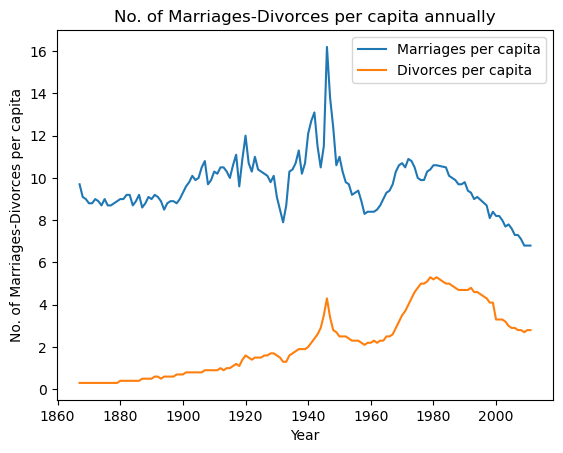

<Figure size 300x1000 with 0 Axes>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

relation = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")

# create figure and axis
fig, ax = plt.subplots()

# plot each column
marriage_capita = relation.loc[relation['Marriages_per_1000'].notna()]
divorce_capita = relation.loc[relation['Divorces_per_1000'].notna()]
ax.plot(marriage_capita['Year'], marriage_capita['Marriages_per_1000'])
ax.plot(divorce_capita['Year'], divorce_capita['Divorces_per_1000'])
plt.title('No. of Marriages-Divorces per capita annually')
plt.xlabel('Year')
plt.ylabel('No. of Marriages-Divorces per capita')
plt.legend(["Marriages per capita", "Divorces per capita"], loc=1, frameon=True)
plt.figure(figsize=(3, 10))
plt.show()

# Question 7

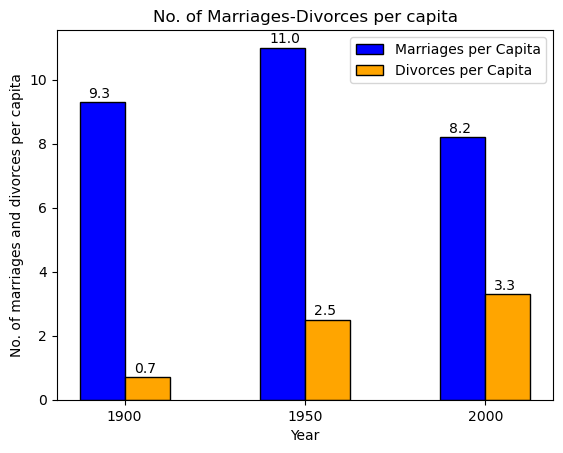

<Figure size 3500x1500 with 0 Axes>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


relation = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")





year_list = [1900, 1950, 2000]
relation_filter = relation.loc[relation['Year'].isin(year_list)]

X_axis = np.arange(relation_filter.shape[0])
width = 0.25    
b1 = plt.bar(X_axis, relation_filter['Marriages_per_1000'], 
        color = 'b', width = width, edgecolor = 'black', 
        label='Marriages per Capita')
b2 = plt.bar(X_axis+width, relation_filter['Divorces_per_1000'], 
        color = 'orange', width = width, edgecolor = 'black', 
        label='Divorces per Capita')
plt.xticks(X_axis + width/2,relation_filter['Year'])

for b in b1:
    yval = b.get_height()
    plt.text(b.get_x()+0.05, yval + .15, yval)
for b in b2:
    yval = b.get_height()
    plt.text(b.get_x()+0.05, yval + .15, yval)
plt.title('No. of Marriages-Divorces per capita')
plt.xlabel('Year')
plt.ylabel('No. of marriages and divorces per capita')
plt.legend()
plt.figure(figsize=(35, 15))
plt.show()

# Question 8

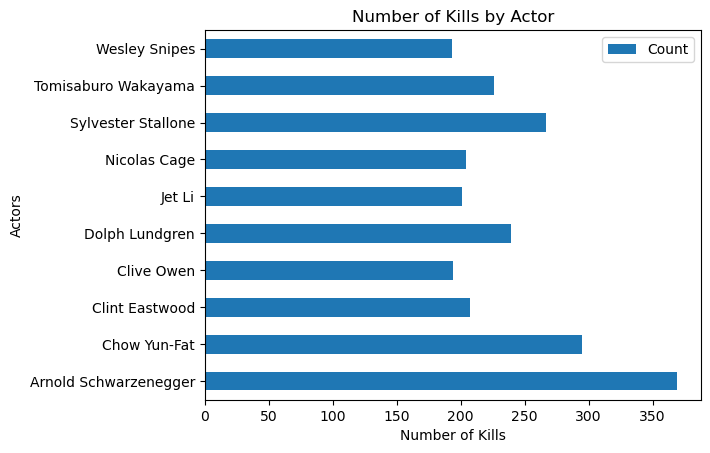

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

relation = pd.read_csv(r"actor_kill_counts.csv")
relation.head()

relation.plot.barh(x='Actor', y='Count')

plt.title("Number of Kills by Actor")
plt.ylabel('Actors')
plt.xlabel('Number of Kills')
plt.show()


# Question 9

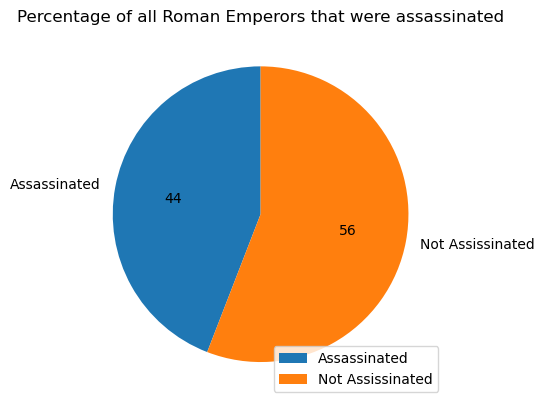

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

relation = pd.read_csv(r"roman-emperor-reigns.csv")

relation1  = relation.loc[relation['Cause_of_Death'].apply(lambda x: x.lower().find('assassinated')!=-1)]
fraction = relation1['Cause_of_Death'].count()/relation['Cause_of_Death'].count()
y = np.array([fraction, 1-fraction])

mylabels = ["Assassinated", "Not Assissinated"]
plt.pie(y, labels = mylabels, autopct='%.f', startangle = 90)
plt.legend(loc = 4)
plt.title('Percentage of all Roman Emperors that were assassinated')
plt.show() 

# Question 10

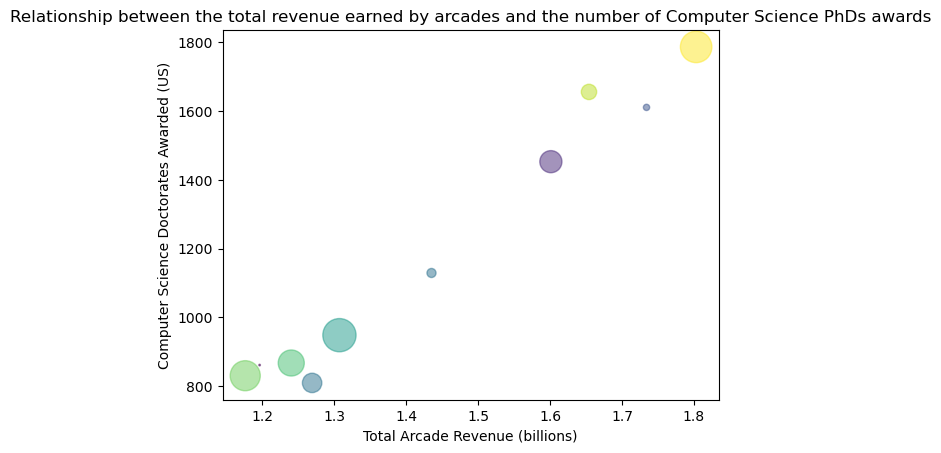

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

relation = pd.read_csv(r"arcade-revenue-vs-cs-doctorates.csv")


x = relation['Total Arcade Revenue (billions)']
y = relation['Computer Science Doctorates Awarded (US)']
colors = np.random.rand(relation.shape[0])
area = (30 * np.random.rand(relation.shape[0]))**2 
fig, axes = plt.subplots()
g = plt.scatter(x, y, s=area, c=colors, alpha=0.5)
axes.set_xlabel("Total Arcade Revenue (billions)")
axes.set_ylabel("Computer Science Doctorates Awarded (US)")
plt.title('Relationship between the total revenue earned by arcades and the number of Computer Science PhDs awards')
plt.show()